In [1]:
import pandas as pd

In [2]:
import random

### Probability Mass Function (PMF)

In [3]:
L = []
for i in range(10000):
  L.append(random.randint(1,6))

In [4]:
L[:5]

[5, 4, 5, 1, 3]

In [5]:
S = (pd.Series(L).value_counts()/10000).sort_index()
#We can see that for a dice roll(1-6),The probability assign to every discrete value is approx. 1/6(0.16) & their sum is = to 1.

In [6]:
S

1    0.1612
2    0.1679
3    0.1682
4    0.1637
5    0.1656
6    0.1734
Name: count, dtype: float64

In [7]:
#Since it is a discrete values, we can plot bar chart, which will show the distribution.

<Axes: >

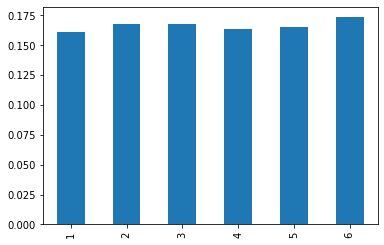

In [8]:
S.plot(kind='bar')
#Almost equally distributed.

In [9]:
l = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  l.append(a + b)

In [10]:
l[:5] #the sum of two rolled dice will be greater the 2 and less that 12.

[10, 9, 9, 8, 3]

In [11]:
s = (pd.Series(l).value_counts()/10000).sort_index()

In [12]:
s # The sum of probabilities distributed is equal to 1.

2     0.0300
3     0.0570
4     0.0842
5     0.1062
6     0.1392
7     0.1694
8     0.1371
9     0.1082
10    0.0848
11    0.0549
12    0.0290
Name: count, dtype: float64

<Axes: >

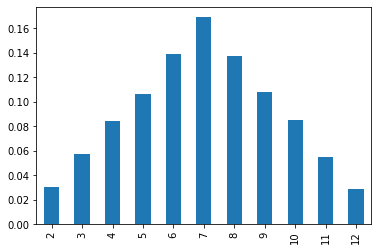

In [13]:
s.plot(kind='bar')

In [14]:
import numpy as np

In [15]:
np.cumsum(s)

2     0.0300
3     0.0870
4     0.1712
5     0.2774
6     0.4166
7     0.5860
8     0.7231
9     0.8313
10    0.9161
11    0.9710
12    1.0000
Name: count, dtype: float64

<Axes: >

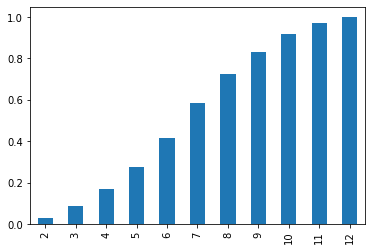

In [16]:
np.cumsum(s).plot(kind='bar')

### Parametric Density Estimation

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000) 

In [18]:
sample.mean()

49.69536474559609

(array([  3.,  10.,  53., 153., 196., 235., 195., 104.,  34.,  17.]),
 array([33.03512115, 36.1387994 , 39.24247766, 42.34615591, 45.44983417,
        48.55351243, 51.65719068, 54.76086894, 57.86454719, 60.96822545,
        64.07190371]),
 <BarContainer object of 10 artists>)

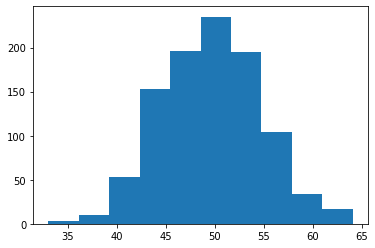

In [19]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [20]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [21]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean, sample_std) #passing 'mean' & 'std'.  #normal function(graph) formula.

In [22]:
values = np.linspace(sample.min(),sample.max(),100)  

In [23]:
sample.max()

64.07190370595781

In [24]:
probabilities = [dist.pdf(value) for value in values]  #passing all values from values in normal formula as x.

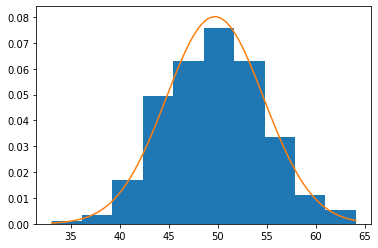

In [25]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

C:\Users\Vedant\AppData\Local\Temp\ipykernel_19424\1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

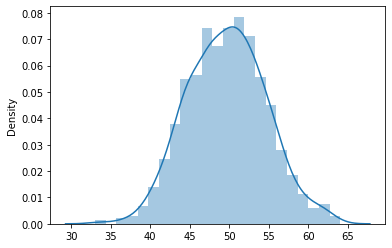

In [26]:
import seaborn as sns
sns.distplot(sample)

### KDE (Non Parametric)

In [27]:
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [28]:
sample

array([20.5071107 , 20.01260148,  9.16303757, 12.46005215, 19.10982596,
       14.29143635, 16.15795555, 18.20709088, 24.38969545, 23.30994855,
       13.41010021, 20.24877903, 26.82690385, 17.0923327 , 15.2615309 ,
       17.85498688, 18.9278763 , 18.68965181, 22.48285509, 20.68852223,
       19.94587308, 24.78935287, 18.74103803,  5.29429518, 27.67194676,
       16.38500574, 15.22150819, 27.9670717 , 21.74659902, 16.04136604,
       20.00631808, 18.76456197, 24.56537891, 21.63940254, 17.71121007,
       21.92715005, 11.43040387,  9.16630422, 14.98218627, 15.25725956,
       17.99405906, 21.4485357 , 16.30532245, 24.48180416, 20.10121265,
       19.44741317, 15.74200399, 11.39924771, 19.07712578, 19.60309728,
       18.2974243 , 18.46338943, 12.78691063, 23.82210745, 23.68658788,
       15.74164883, 21.06794175, 17.019218  , 15.46840054, 18.84073648,
       18.88974584, 16.19262558, 21.22976018, 17.68086344, 26.27016973,
       18.66592784, 17.03137575, 18.89125173, 20.36183611, 19.64

(array([ 3.,  0.,  1.,  3.,  2.,  5.,  4.,  5., 12.,  9., 19., 15., 25.,
        31., 32., 26., 20., 11., 14., 18., 14., 12., 15.,  4.,  8., 19.,
         5., 17., 16., 25., 38., 42., 53., 63., 63., 63., 53., 48., 47.,
        41., 26., 22., 17., 12.,  9.,  6.,  4.,  0.,  0.,  3.]),
 array([ 4.74137151,  5.74167864,  6.74198577,  7.7422929 ,  8.74260003,
         9.74290716, 10.74321429, 11.74352142, 12.74382854, 13.74413567,
        14.7444428 , 15.74474993, 16.74505706, 17.74536419, 18.74567132,
        19.74597845, 20.74628558, 21.74659271, 22.74689983, 23.74720696,
        24.74751409, 25.74782122, 26.74812835, 27.74843548, 28.74874261,
        29.74904974, 30.74935687, 31.749664  , 32.74997112, 33.75027825,
        34.75058538, 35.75089251, 36.75119964, 37.75150677, 38.7518139 ,
        39.75212103, 40.75242816, 41.75273529, 42.75304241, 43.75334954,
        44.75365667, 45.7539638 , 46.75427093, 47.75457806, 48.75488519,
        49.75519232, 50.75549945, 51.75580658, 52.7561137 ,

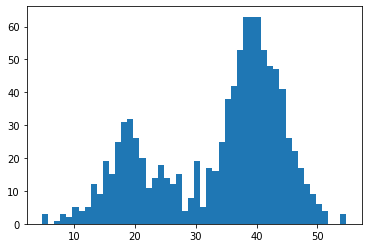

In [29]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [30]:
from sklearn.neighbors import KernelDensity
#Kernel Density: Used for creating or calculating Non parametric density estimation

model = KernelDensity(bandwidth=5, kernel='gaussian')
#bandwidth is nothing but the standard deviation of each kernel.
# convert data to a 2D array because the ml model works on 2d data
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [31]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [32]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

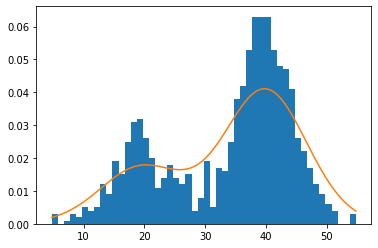

In [33]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

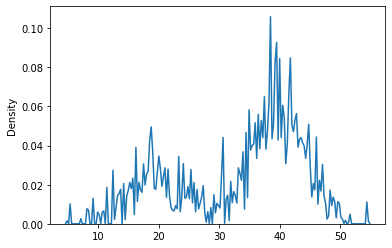

In [34]:
#using seaborn
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

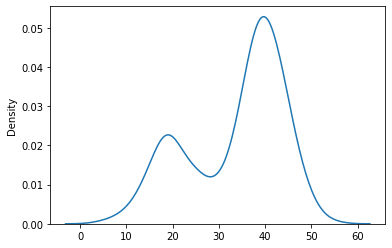

In [35]:
sns.kdeplot(sample.reshape(1000),bw_adjust=1)

### How to use PDF(Density) in ml3?

- It can be used for feature engineering (selecting feature)

In [36]:
df = sns.load_dataset('iris')

In [37]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a

<Axes: xlabel='sepal_length', ylabel='Density'>

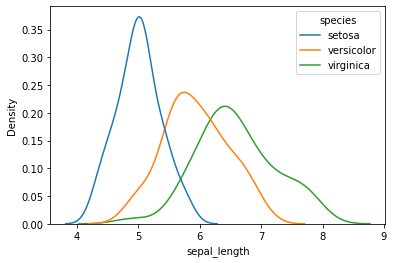

In [38]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a

<Axes: xlabel='sepal_width', ylabel='Density'>

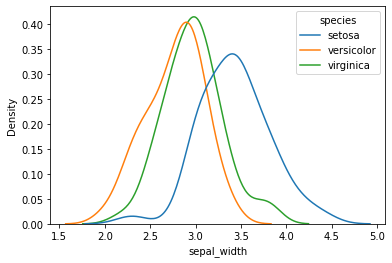

In [39]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a

<Axes: xlabel='petal_length', ylabel='Density'>

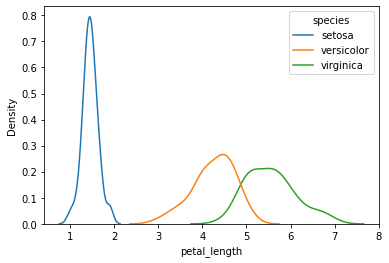

In [40]:
sns.kdeplot(data=df,x='petal_length',hue='species')

C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a

<Axes: xlabel='petal_width', ylabel='Density'>

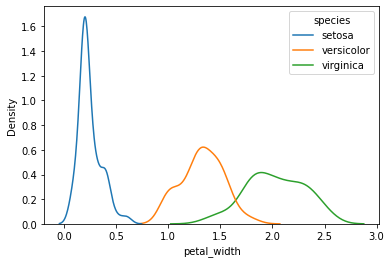

In [41]:
sns.kdeplot(data=df,x='petal_width',hue='species')

C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a

<Axes: xlabel='petal_width', ylabel='Density'>

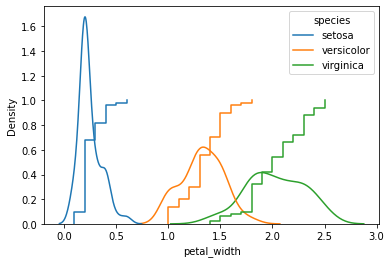

In [43]:
#CDF
sns.kdeplot(data=df,x='petal_width',hue='species')
sns.ecdfplot(data=df,x='petal_width',hue='species')

In [44]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [45]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a

<Axes: xlabel='Age', ylabel='Density'>

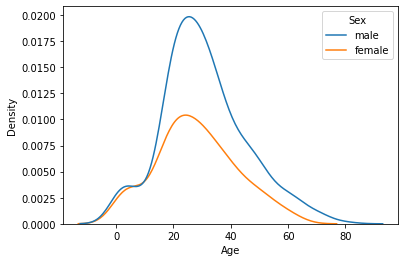

In [46]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

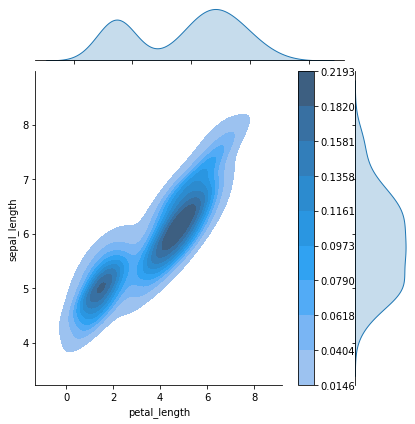

In [47]:
sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

### Normal Distribution to Standard Normal Variate

C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

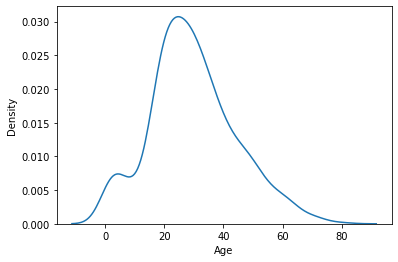

In [48]:
sns.kdeplot(titanic['Age'])

In [49]:
titanic['Age'].mean()

29.69911764705882

In [50]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

C:\Python 3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

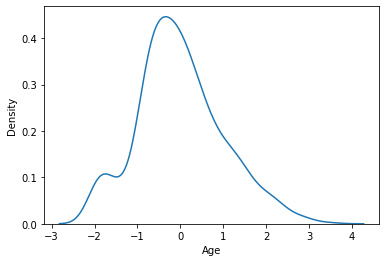

In [51]:
sns.kdeplot(x)
#Standardized distribution

In [53]:
x.mean()
#not 0 but close to 0

2.338621049070358e-16

In [54]:
x.std()

1.0